In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [87]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [88]:
df.head(10).style.hide_index()

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.000000,Up,0
45,F,ATA,130,237,0,Normal,170,N,0.000000,Up,0
54,M,ATA,110,208,0,Normal,142,N,0.000000,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.500000,Flat,1
48,F,ATA,120,284,0,Normal,120,N,0.000000,Up,0


In [89]:
df.shape

(918, 12)

In [90]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [91]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [92]:
string_col = df.select_dtypes(include = "object").columns
df[string_col] = df[string_col].astype("string")

In [93]:
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [94]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

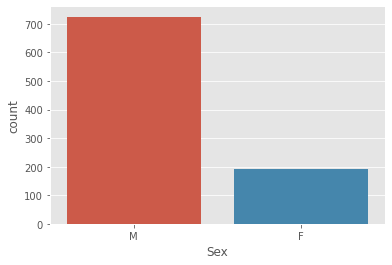

In [95]:
categorical = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
plt.style.use('ggplot')
sns.countplot(x = categorical[0], data = df)

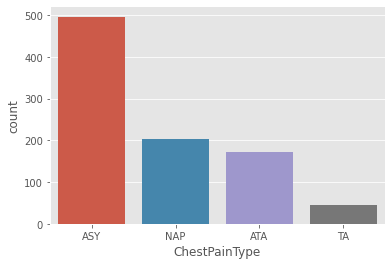

In [96]:
sns.countplot(x = categorical[1], data = df, order = df[categorical[1]].value_counts().index)

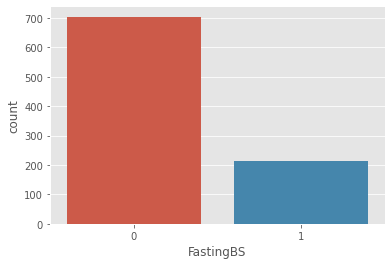

In [97]:
sns.countplot(x = categorical[2], data = df)

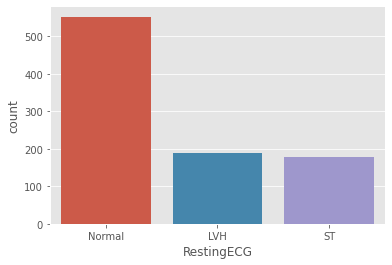

In [98]:
sns.countplot(x = categorical[3],  data = df, order = df[categorical[3]].value_counts().index)

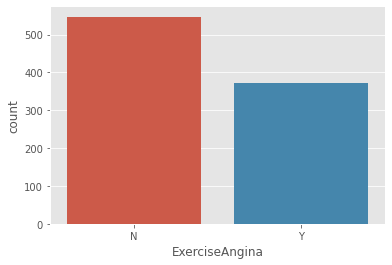

In [99]:
sns.countplot(x = categorical[4], data = df)

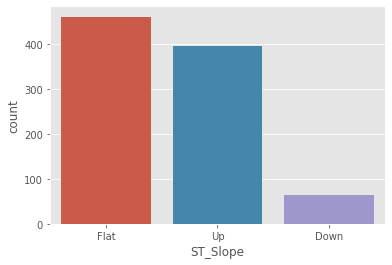

In [100]:
sns.countplot(x = categorical[5], data = df, order = df[categorical[5]].value_counts().index)

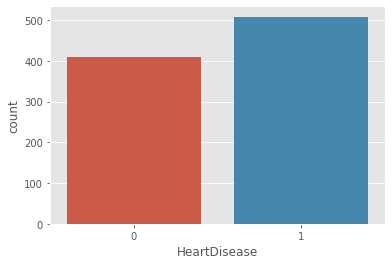

In [101]:
sns.countplot(x = categorical[6], data = df)

In [102]:
numerical = df.columns.drop(categorical)
numerical

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

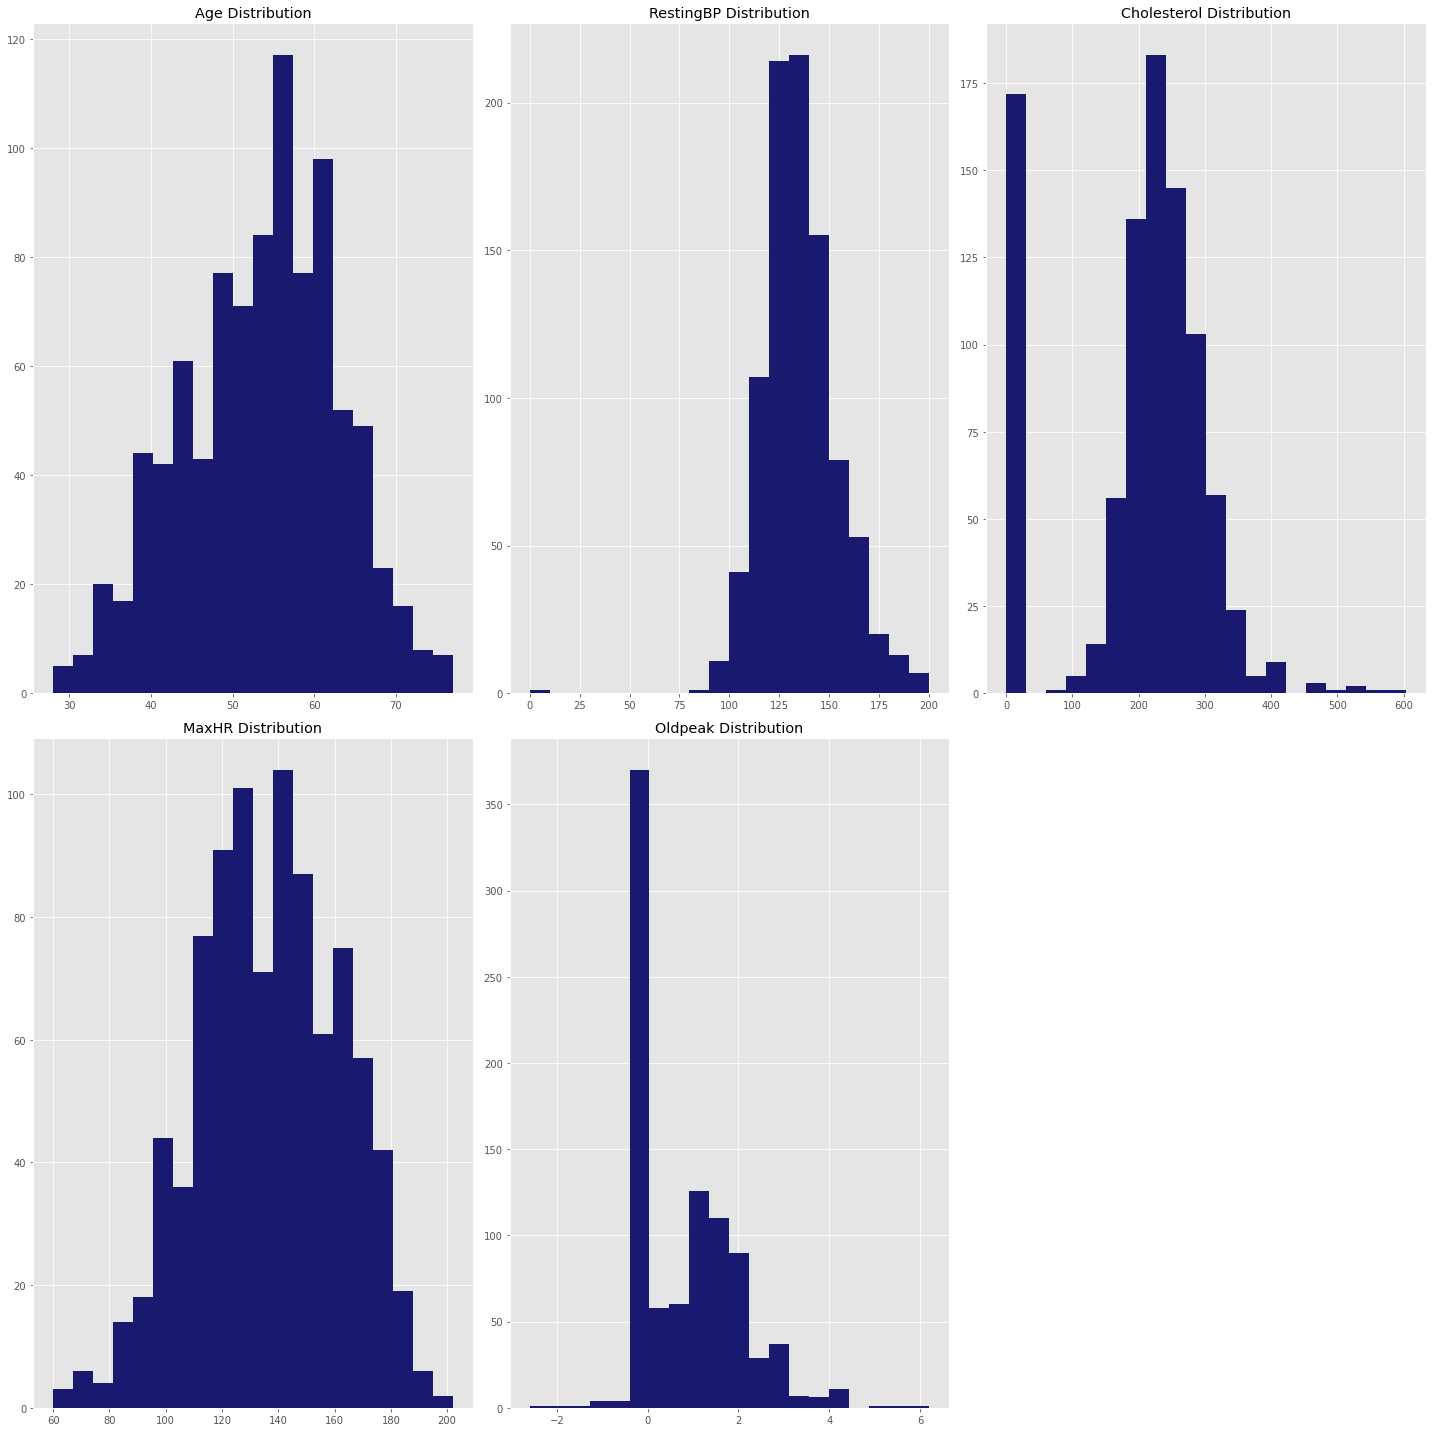

In [103]:
def plot_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax ,facecolor='midnightblue')
        ax.set_title(feature+" Distribution")
        
    fig.tight_layout()  
    plt.show()
plot_histograms(df, numerical, 2, 3)

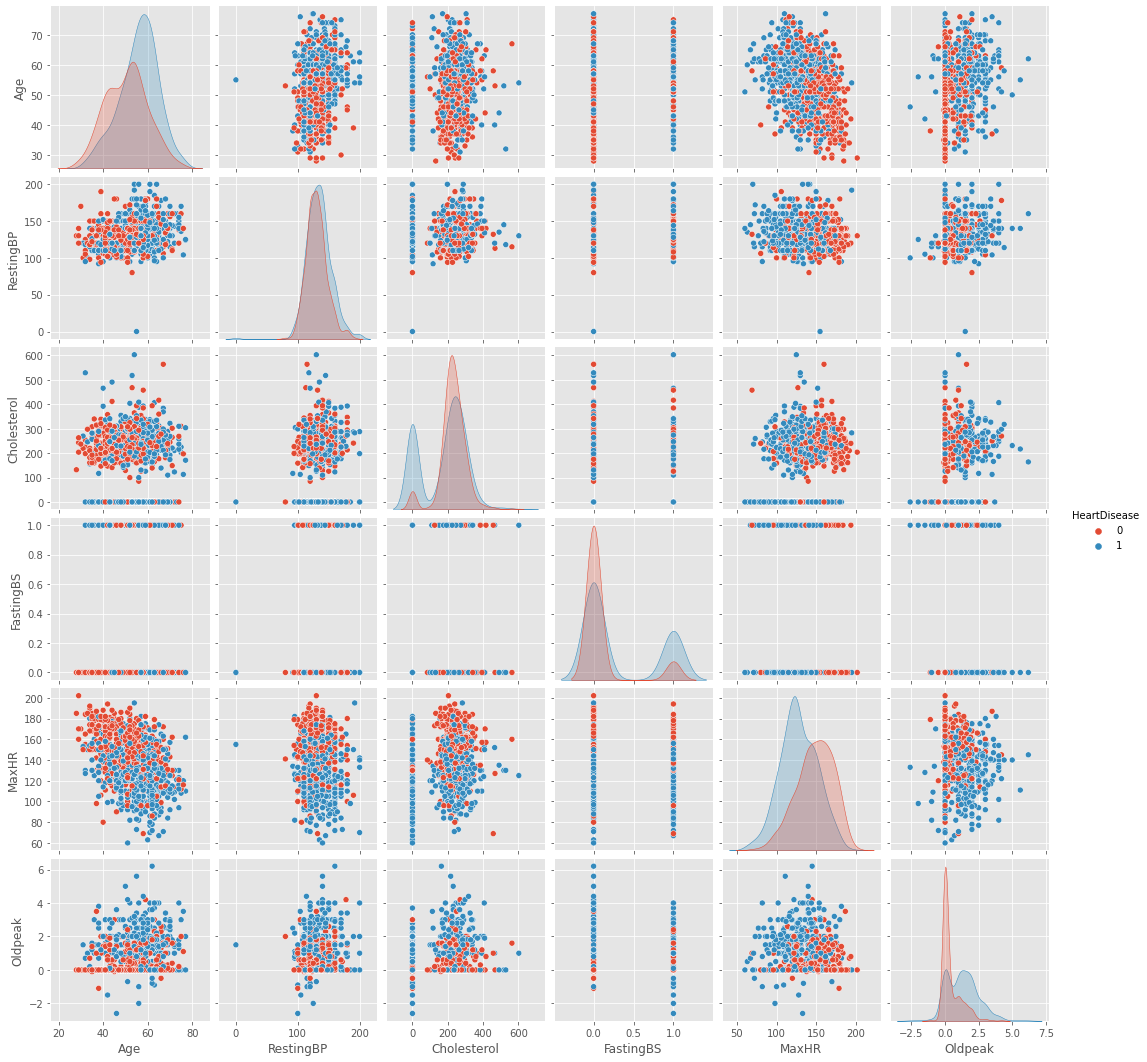

In [104]:
sns.pairplot(df, hue = "HeartDisease")

Text(0.5, 1.0, 'Correlation of the features')

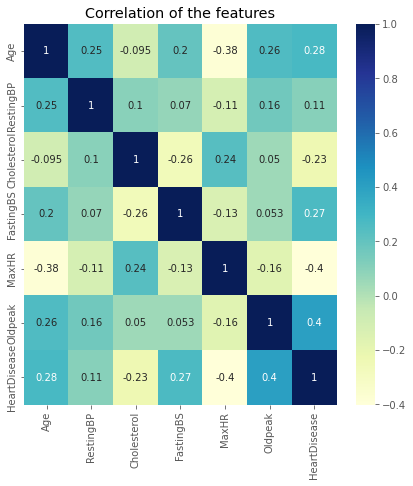

In [105]:
corr = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap="YlGnBu");
plt.title('Correlation of the features')

In [106]:
fig = px.box(df, x = "HeartDisease", y = "Age", title = "Distrubution of Age")
fig.show()

In [107]:
fig = px.box(df, x = "HeartDisease", y = "RestingBP",title = "Distrubution of RestingBP")
fig.show()

In [108]:
fig = px.box(df, x = "HeartDisease", y = "Cholesterol", title = "Distrubution of Cholestrol")
fig.show()

In [109]:
fig = px.box(df, x = "HeartDisease", y = "Oldpeak", title = "Distrubution of Oldpeak")
fig.show()

In [110]:
fig = px.box(df, x = "HeartDisease", y = "MaxHR", title = "Distrubution of MaxHR")
fig.show()

In [111]:
df.loc[(df['RestingBP']==0)].shape[0]

1

In [112]:
df = df.loc[~(df['RestingBP']==0)]

In [113]:
df.loc[df['Cholesterol']==0].shape[0]

171

In [114]:
df.loc[df['Cholesterol']==0, 'Cholesterol'] = np.nan
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [115]:
df_dummies=pd.get_dummies(df,columns=string_col,drop_first=True)
df_dummies.reset_index(drop=True, inplace=True)

In [116]:
from sklearn.model_selection import train_test_split
x = df_dummies.drop(columns='HeartDisease', axis=1)
y=df_dummies['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=42, stratify=y)

In [117]:
train_set = pd.concat([x_train, y_train], axis=1)
test_set = pd.concat([x_test, y_test], axis=1)

In [118]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it = impute_it.fit(train_set)
imputed_train_set = pd.DataFrame(impute_it.transform(train_set), columns=train_set.columns)
imputed_test_set = pd.DataFrame(impute_it.transform(test_set), columns=test_set.columns)

In [119]:
from sklearn.preprocessing import RobustScaler
features_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
ro_scaler=RobustScaler()
ro_scaler.fit(imputed_train_set[features_to_scale])
imputed_train_set[features_to_scale]=ro_scaler.transform(imputed_train_set[features_to_scale])
imputed_test_set[features_to_scale]=ro_scaler.transform(imputed_test_set[features_to_scale])

In [120]:
# Logistic Regression

In [121]:
cols = imputed_train_set.columns.drop('HeartDisease')
imputed_y_train = imputed_train_set['HeartDisease']
imputed_x_train = imputed_train_set[cols]

In [122]:
imputed_y_test = imputed_test_set['HeartDisease']
imputed_x_test = imputed_test_set[cols]

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



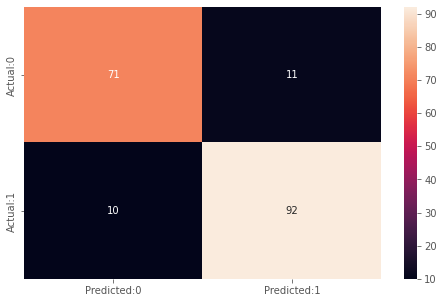

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
logis=LogisticRegression()
logis.fit(imputed_x_train,imputed_y_train)
logis_y_pred=logis.predict(imputed_x_test)
print(classification_report(y_test, logis_y_pred))
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score
cm=confusion_matrix(imputed_y_test,logis_y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [124]:
# Support Vector Machine(SVM)

In [125]:
from sklearn.svm import SVC
kernels = ["poly", "rbf", "sigmoid"]
C = [1, 10, 20]
svm_acc_score = {}
for kernel in kernels:
    for Cval in C:
        clf = SVC(kernel=kernel, C=Cval)
        clf.fit(imputed_x_train,imputed_y_train)
        y_pred = clf.predict(imputed_x_test)
        acc = accuracy_score(imputed_y_test, y_pred)
        svm_acc_score.update({f'{kernel} and {Cval}': round(acc, 4)})

In [126]:
{k: v for k, v in reversed(sorted(svm_acc_score.items(), key=lambda item: item[1]))}

{'poly and 1': 0.8804,
 'poly and 10': 0.8533,
 'poly and 20': 0.8424,
 'rbf and 1': 0.8804,
 'rbf and 10': 0.8478,
 'rbf and 20': 0.8478,
 'sigmoid and 1': 0.8043,
 'sigmoid and 10': 0.75,
 'sigmoid and 20': 0.7826}

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



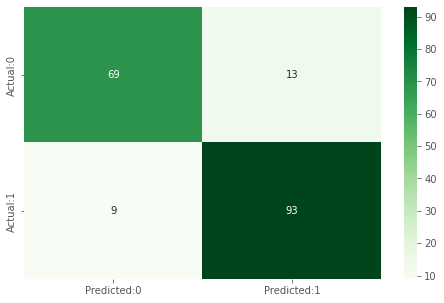

In [127]:
SVM = SVC(kernel='rbf', C=1)
SVM.fit(imputed_x_train,imputed_y_train)
SVM_y_pred = SVM.predict(imputed_x_test)
print(classification_report(y_test, SVM_y_pred))
cm=confusion_matrix(imputed_y_test,SVM_y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap="Greens")

In [128]:
# KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(imputed_x_train,imputed_y_train)
knn_y_pred = knn.predict(imputed_x_test)
knn_proba = knn.predict_proba(imputed_x_test)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



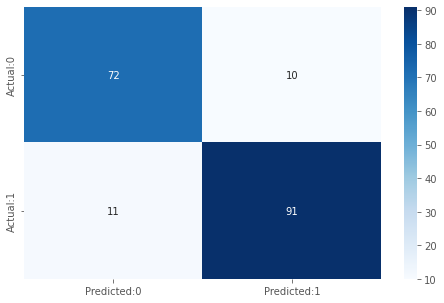

In [130]:
print(classification_report(y_test, knn_y_pred))
cm=confusion_matrix(imputed_y_test,knn_y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap="Blues")

In [131]:
# Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier 
dTree = DecisionTreeClassifier().fit(imputed_x_train,imputed_y_train)

In [133]:
from sklearn.metrics import mean_squared_error
y_pred_dt = dTree.predict(imputed_x_test)
np.sqrt(mean_squared_error(imputed_y_test,y_pred_dt))

0.48900964692182575

In [134]:
print('Training set score: {:.4f}'.format(dTree.score(imputed_x_train, imputed_y_train)))
print('Test set score: {:.4f}'.format(dTree.score(imputed_x_test, imputed_y_test)))

Training set score: 1.0000
Test set score: 0.7609


              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74        86
         1.0       0.76      0.80      0.78        98

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



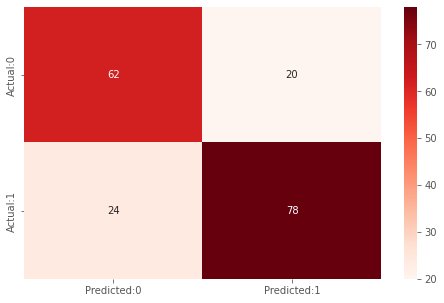

In [135]:
print(classification_report(y_pred_dt,imputed_y_test))
cm=confusion_matrix(imputed_y_test,y_pred_dt)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap="Reds")

In [136]:
# Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(imputed_x_train, imputed_y_train)
RF_y_pred = random_forest.predict(imputed_x_test)
RF_proba =  random_forest.predict_proba(imputed_x_test)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



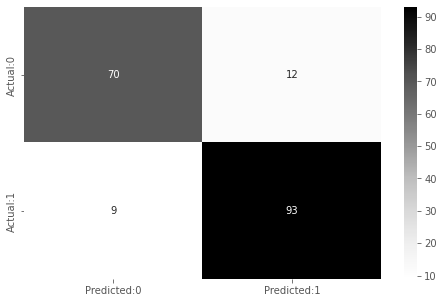

In [138]:
print(classification_report(y_test, RF_y_pred))
cm=confusion_matrix(imputed_y_test,RF_y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap="Greys")